# 03 Feature Engineering - Energy Prediction<a id=''></a>

## 1. Introduction <a id='1'></a>

The main task for the notebook is to perform feature engineering for the cleaned and merged datatset.

## 2. Feature Engineering <a id='2'></a>

### 2.1 Imports <a id='2.1'></a>

In [673]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# Metrics & Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
%matplotlib inline

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import statsmodels.api as sm

In [674]:
path = '../data/'
file_name = 'mlmodeldata.csv'
full_path = path + file_name
df = pd.read_csv(full_path, index_col=[0])

In [675]:
df.head()

building_id  loc_id           subUsage     sqm  Unnamed: 0_x  index  \
0          789     7.0  College Classroom  6000.0             0      0   
1          789     7.0  College Classroom  6000.0             1      1   
2          789     7.0  College Classroom  6000.0             2      2   
3          789     7.0  College Classroom  6000.0             3      3   
4          789     7.0  College Classroom  6000.0             4      4   

             timestamp  meter_reading  Unnamed: 0_y site_id  airTemperature  \
0  2016-01-01 00:00:00         516.43         17544  Ottawa            -2.2   
1  2016-01-01 01:00:00         519.40         17545  Ottawa            -2.3   
2  2016-01-01 02:00:00         501.68         17546  Ottawa            -2.8   
3  2016-01-01 03:00:00         507.87         17547  Ottawa            -3.0   
4  2016-01-01 04:00:00         509.45         17548  Ottawa            -3.3   

   dewTemperature  seaLvlPressure  windDirection  windSpeed  
0            -3.6          1014.5          270.0        2.1  
1            -3.8          1014.5          260.0        2.1  
2            -4.0          1014.0          260.0        1.5  
3            -3.8          1014.0          260.0        1.5  
4            -3.8          1013.5          230.0        1.0

In [676]:
# columns to be removed
columns = ['loc_id', 'Unnamed: 0_x', 'index', 'Unnamed: 0_y']

df = df.drop(columns=columns)

In [677]:
df.head()

building_id           subUsage     sqm            timestamp  meter_reading  \
0          789  College Classroom  6000.0  2016-01-01 00:00:00         516.43   
1          789  College Classroom  6000.0  2016-01-01 01:00:00         519.40   
2          789  College Classroom  6000.0  2016-01-01 02:00:00         501.68   
3          789  College Classroom  6000.0  2016-01-01 03:00:00         507.87   
4          789  College Classroom  6000.0  2016-01-01 04:00:00         509.45   

  site_id  airTemperature  dewTemperature  seaLvlPressure  windDirection  \
0  Ottawa            -2.2            -3.6          1014.5          270.0   
1  Ottawa            -2.3            -3.8          1014.5          260.0   
2  Ottawa            -2.8            -4.0          1014.0          260.0   
3  Ottawa            -3.0            -3.8          1014.0          260.0   
4  Ottawa            -3.3            -3.8          1013.5          230.0   

   windSpeed  
0        2.1  
1        2.1  
2        1.5  
3        1.5  
4        1.0

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  336171 non-null  float64
 7   dewTemperature  335252 non-null  float64
 8   seaLvlPressure  335492 non-null  float64
 9   windDirection   336171 non-null  float64
 10  windSpeed       336171 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [679]:
# fill airTemperature,dewTemperature,seaLvlPressure, windDirection, windSpeed missing values with interpolation
df.airTemperature.interpolate(method='linear', inplace=True)
df.dewTemperature.interpolate(method='linear', inplace=True)
df.seaLvlPressure.interpolate(method='linear', inplace=True)
df.windDirection.interpolate(method='linear', inplace=True)
df.windSpeed.interpolate(method='linear', inplace=True)

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  349756 non-null  float64
 7   dewTemperature  349756 non-null  float64
 8   seaLvlPressure  349756 non-null  float64
 9   windDirection   349756 non-null  float64
 10  windSpeed       349756 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [681]:
df = df[df['meter_reading'] != 0]

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341735 entries, 0 to 348505
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     341735 non-null  int64  
 1   subUsage        341735 non-null  object 
 2   sqm             341735 non-null  float64
 3   timestamp       341735 non-null  object 
 4   meter_reading   341735 non-null  float64
 5   site_id         341735 non-null  object 
 6   airTemperature  341735 non-null  float64
 7   dewTemperature  341735 non-null  float64
 8   seaLvlPressure  341735 non-null  float64
 9   windDirection   341735 non-null  float64
 10  windSpeed       341735 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 31.3+ MB


In [683]:
# Add features - timestamp features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.weekday
df['hour'] = df.timestamp.dt.hour
df['year'] = df.timestamp.dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341735 entries, 0 to 348505
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   building_id     341735 non-null  int64         
 1   subUsage        341735 non-null  object        
 2   sqm             341735 non-null  float64       
 3   timestamp       341735 non-null  datetime64[ns]
 4   meter_reading   341735 non-null  float64       
 5   site_id         341735 non-null  object        
 6   airTemperature  341735 non-null  float64       
 7   dewTemperature  341735 non-null  float64       
 8   seaLvlPressure  341735 non-null  float64       
 9   windDirection   341735 non-null  float64       
 10  windSpeed       341735 non-null  float64       
 11  month           341735 non-null  int64         
 12  weekday         341735 non-null  int64         
 13  hour            341735 non-null  int64         
 14  year            341735 non-null  int

<AxesSubplot:>

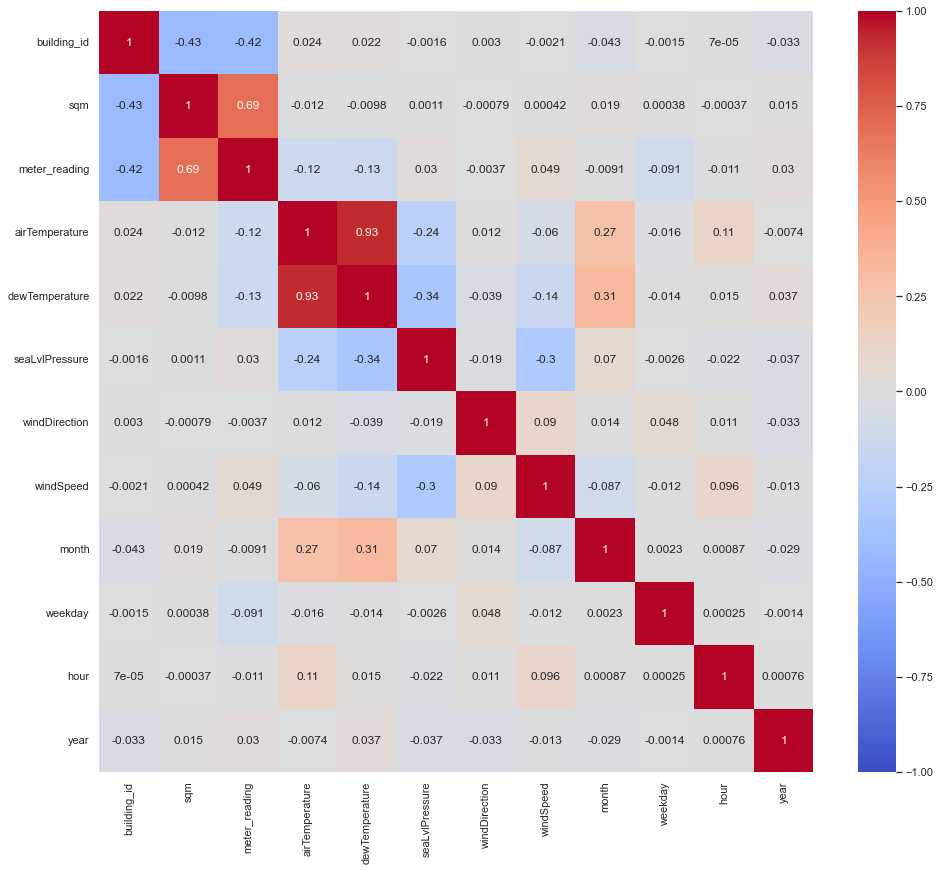

In [684]:
sns.set(rc={'figure.figsize':(16,14)})
sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

### 2.2 Feature Selection & Goal Statement<a id='2.2'></a>

After a closer examination of the data, the general goal of the task is to predict the energy consumption of a building at a given month, given weekday, given hour of the time, given windSpeed, given sqm.

The following features will be selected:
* sqm (building size)
* subUsage (use of building, category)
* meter_reading (reading of meter)
* airTemperature (temperature)
* WindSpeed (speed of wind)
* month
* weekday
* hour

In [685]:
# selected features
columns = ['building_id', 'sqm', 'subUsage', 'airTemperature', 'windSpeed', 'month', 'weekday', 'hour', 'year', 'timestamp', 'meter_reading']
df = df[columns]

In [686]:
df.head()

building_id     sqm           subUsage  airTemperature  windSpeed  month  \
0          789  6000.0  College Classroom            -2.2        2.1      1   
1          789  6000.0  College Classroom            -2.3        2.1      1   
2          789  6000.0  College Classroom            -2.8        1.5      1   
3          789  6000.0  College Classroom            -3.0        1.5      1   
4          789  6000.0  College Classroom            -3.3        1.0      1   

   weekday  hour  year           timestamp  meter_reading  
0        4     0  2016 2016-01-01 00:00:00         516.43  
1        4     1  2016 2016-01-01 01:00:00         519.40  
2        4     2  2016 2016-01-01 02:00:00         501.68  
3        4     3  2016 2016-01-01 03:00:00         507.87  
4        4     4  2016 2016-01-01 04:00:00         509.45

In [687]:
df.shape

(341735, 11)

In [688]:
df.describe()

building_id            sqm  airTemperature      windSpeed  \
count  341735.000000  341735.000000   341735.000000  341735.000000   
mean      851.364964   25238.490536        7.624755       3.445009   
std        99.519570   19823.883431       12.015891       2.002194   
min       789.000000    6000.000000      -28.800000       0.000000   
25%       793.000000    8659.100000       -0.900000       2.100000   
50%       798.000000   16999.900000        8.100000       3.100000   
75%       803.000000   37999.900000       17.600000       4.600000   
max      1032.000000   70999.900000       33.900000      13.400000   

               month        weekday           hour           year  \
count  341735.000000  341735.000000  341735.000000  341735.000000   
mean        6.446960       3.002089      11.501637    2016.492343   
std         3.419344       1.999548       6.918356       0.499942   
min         1.000000       0.000000       0.000000    2016.000000   
25%         3.000000       1.000000       6.000000    2016.000000   
50%         6.000000       3.000000      12.000000    2016.000000   
75%         9.000000       5.000000      17.000000    2017.000000   
max        12.000000       6.000000      23.000000    2017.000000   

       meter_reading  
count  341735.000000  
mean     2767.385412  
std      3060.092556  
min         0.110000  
25%       499.686000  
50%      1405.090000  
75%      4428.840000  
max     21507.570000

In [689]:
# only model energy consumption of college classroom
df = df[df['subUsage'] == 'College Classroom']

# store building_id information
builidng_id = df["building_id"]

# drop not necessary columns
columns_drop = ['building_id', 'timestamp', 'subUsage']
df.drop(columns=columns_drop, inplace=True)
df.head()

sqm  airTemperature  windSpeed  month  weekday  hour  year  \
0  6000.0            -2.2        2.1      1        4     0  2016   
1  6000.0            -2.3        2.1      1        4     1  2016   
2  6000.0            -2.8        1.5      1        4     2  2016   
3  6000.0            -3.0        1.5      1        4     3  2016   
4  6000.0            -3.3        1.0      1        4     4  2016   

   meter_reading  
0         516.43  
1         519.40  
2         501.68  
3         507.87  
4         509.45

In [690]:
# 2016 data will be used for training, 2017 data will be our target for prediction!
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]

df_2016.to_csv('../data/2016_data.csv')
df_2017.to_csv('../data/2017_data.csv')

### 2.3 Data Splitting <a id='2.3'></a>

In [692]:
df_2016.columns
df_2016.drop(columns=['year'], inplace=True)
df_2016.head()

KeyError: "['year'] not found in axis"

In [693]:
# one hotcode month
month_df = pd.get_dummies(df_2016['month'], prefix='month')
df_2016 = df_2016.join(month_df)
df_2016.drop(columns='month', inplace=True)

# one hotcode weekday
weekday_df = pd.get_dummies(df_2016['weekday'], prefix='weekday')
df_2016 = df_2016.join(weekday_df)
df_2016.drop(columns='weekday', inplace=True)

# one hotcode hour
hour_df = pd.get_dummies(df_2016['hour'], prefix='hour')
df_2016 = df_2016.join(hour_df)
df_2016.drop(columns='hour', inplace=True)



In [719]:
df_2016.shape

(130080, 47)

In [695]:

df_2016.columns

Index(['sqm', 'airTemperature', 'windSpeed', 'meter_reading', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

### 2.4 Training/Test Data Split <a id='2.5'></a>

In [696]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2016.drop(columns=['meter_reading']), 
                                                    df_2016['meter_reading'], test_size=0.2, 
                                                    random_state=47)

## 3.0 Modeling <a id='3.0'></a>

### 3.1 Data Scaling <a id='3.1'></a>

In [697]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# transform both training and testing dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.2 Linear Regression Model <a id='3.2'></a>

#### 3.2.1 Linear Regression Model Training and Testing <a id='3.2.1'></a>

In [698]:
from sklearn.linear_model import LinearRegression

# train the data
lm = LinearRegression()
lm = lm.fit(X_train_scaled, y_train)

# predict data
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)

#### 3.2.2 Model Evaluator <a id='3.2.2'></a>

In [699]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [700]:
r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)

(0.4882261841909452, 0.4839035125258263)

In [701]:
mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)

(4874808.116757202, 4882860.315982845)

In [702]:
mean_absolute_error(y_train,y_train_pred), mean_absolute_error(y_test,y_test_pred)

(1644.1901801566526, 1642.192030234027)

The value above indicates that Linear Regression Model may not be a good model for the dataset.

### 3.3 Random Forest Model <a id='3.3'></a>

In [703]:
#Set n_est as the number of Estimators
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

#Set Maximum Depth, including a None as no limit
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Set maximum features
max_features = ['auto', 'sqrt']

#Set minimum sample split
min_samples_split = [2, 5, 10]

#Set minimum samples leaf
min_samples_leaf = [1, 2, 4]

#Set bootstrap
bootstrap = [True, False]

In [704]:
# Create the random grid
param_grid = {'n_estimators': n_est,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [705]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 12, 16, 20, 26, 33,
                                                         42, 54, 69, 88, 112,
                                                         143, 183, 233, 297,
                                                         379, 483, 615, 784,
                                                         1000]},
                   

In [706]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [707]:
rf_neg_mae = cross_validate(rf_random.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(488.55159376638477, 7.3192087510695965)

In [708]:
mean_absolute_error(y_test, rf_random.best_estimator_.predict(X_test))

477.28509506718666

In [709]:
r2_score(y_test, rf_random.best_estimator_.predict(X_test))

0.9286072687958705

In [713]:
# one hotcode month
month_df = pd.get_dummies(df_2017['month'], prefix='month')
df_2017 = df_2017.join(month_df)
df_2017.drop(columns='month', inplace=True)

# one hotcode weekday
weekday_df = pd.get_dummies(df_2017['weekday'], prefix='weekday')
df_2017 = df_2017.join(weekday_df)
df_2017.drop(columns='weekday', inplace=True)

# one hotcode hour
hour_df = pd.get_dummies(df_2017['hour'], prefix='hour')
df_2017 = df_2017.join(hour_df)
df_2017.drop(columns='hour', inplace=True)


KeyError: 'month'

In [720]:
df_2017.shape
df_2017.columns

Index(['sqm', 'airTemperature', 'windSpeed', 'year', 'meter_reading',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')

In [721]:
df_2016.columns

Index(['sqm', 'airTemperature', 'windSpeed', 'meter_reading', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [725]:
r2_score(df_2017['meter_reading'], rf_random.best_estimator_.predict(df_2017.drop(columns=['meter_reading','year'])))

0.4589611093679724

In [736]:
df_2017

Empty DataFrame
Columns: [sqm, airTemperature, windSpeed, year, meter_reading, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, month_12, weekday_0, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23]
Index: []

[0 rows x 48 columns]

In [734]:
r2_score(df_2017['meter_reading'], rf_random.best_estimator_.predict(df_2017.drop(columns=['meter_reading','year'])))

ValueError: Found array with 0 sample(s) (shape=(0, 46)) while a minimum of 1 is required.